<a href="https://colab.research.google.com/github/RajaChowdhury/Netflix-Movies-and-TV-Shows-Clustering---Capstone-Project/blob/main/Colab_Notebook_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_Unsupervised_ML_Raja_Chowdhury.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**


---



This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



## **Attribute Information**

1. **show_id** : Unique ID for every Movie / Tv Show

2. **type** : Identifier - A Movie or TV Show

3. **title** : Title of the Movie / Tv Show

4. **director** : Director of the Movie

5. **cast** : Actors involved in the movie / show

6. **country** : Country where the movie / show was produced

7. **date_added** : Date it was added on Netflix

8. **release_year** : Actual Releaseyear of the movie / show

9. **rating** : TV Rating of the movie / show

10. **duration** : Total Duration - in minutes or number of seasons

11. **listed_in** : Genere

12. **description**: The Summary description

# **Introduction**


---



**Netflix** is an American company that revolutionized the watching of movies and television shows. Established in 1997 in California by Reed Hastings (the current CEO) and Marc Randolph. Netflix offers film and television series library through distribution deals as well as its own productions, known as Netflix Originals. In 2007 Netflix started subscription based streaming service that allows it's members to watch TV shows and movies on an internet connected device. Depending on our plan, we can also download TV shows and movies to our iOS, Android, or Windows 10 device and watch without an internet connection. The movie and television library, and recommendation system make accurate suggestion movie to the customers and the convenience of access and relatively low price brought Netflix dominated position in the market. They have over 8000 movies or tv shows available on their platform, as of now, they have over 200M subscribers globally and in 2021 they made $5.1 billion of net profit.

Netflix users value this platform for a wide offer, high-quality subtitles, and, yes, accurate, personalized recommendations. Netflix exploits an advanced machine-learning-based recommendation system that analyzes users’ choices to suggest them new movies and TV shows. In essence, it’s a set of algorithms using machine learning to analyze user data and movie ratings. To make it more effective, Netflix has set up 1,300 recommendation clusters based on users viewing preferences. As a result, whenever you turn on Netflix, you see a list of movies and TV shows tailored to your interests and user profile. The goal is to help each user find a movie or a TV show they will enjoy and do so as quickly as possible (estimations are they have just 90 seconds for that). The recommendation system itself remains in the back end and is invisible to the user.


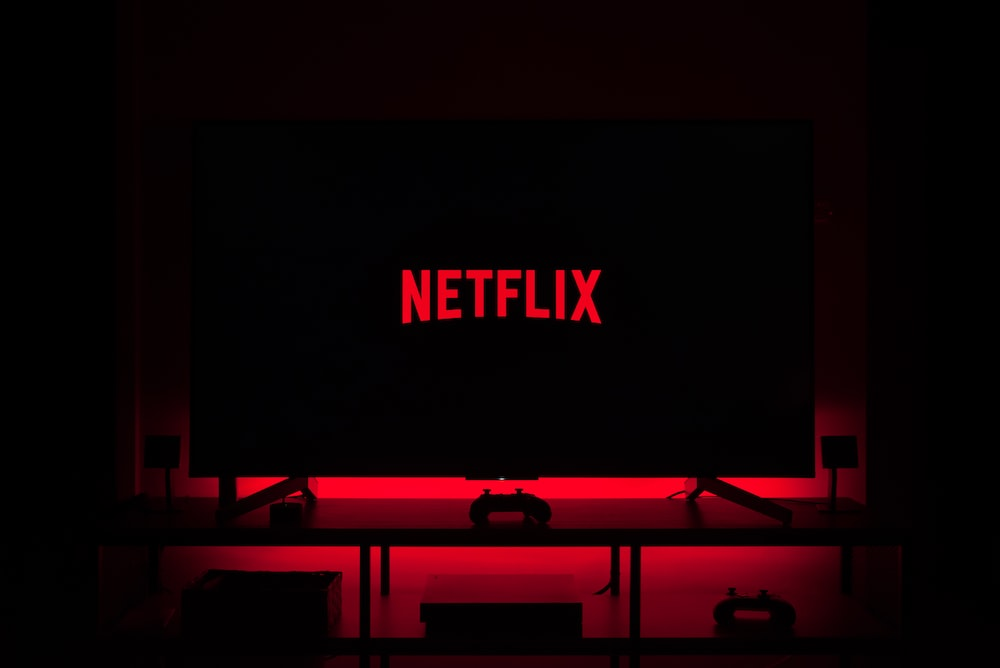

# **1. Importing Required Libraries And Loading The Datasets**

---



**Importing Liabraries**

In [169]:
# Importing Essential Libraries
import pandas as pd
import numpy as np
from pandas import datetime as dt
from pandas import Series,DataFrame
import datetime

# Importing Libraries For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import missingno as msno
import matplotlib.cm as cm

# Importing Libraries For NPL
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

**Mounting The Drive**

In [170]:
# Mounting My Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading The Datasets**

In [171]:
# Loading My Datasets
df = pd.read_csv("/content/drive/MyDrive/Netflix Movies and TV Shows Clustering- Unsupervised ML- Raja Chowdhury/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

# **2. Understanding Dataset**

---



In [172]:
# Top 10 Rows Of The Dataframe
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [173]:
# Bottom 10 Rows Of The Dataframe
df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [174]:
# Looking at the random five rows of our dataset

df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5038,s5039,TV Show,Queer Eye: We're in Japan!,NaN,"Bobby Berk, Karamo Brown, Tan France, Antoni P...","United States, Japan","November 1, 2019",2019,TV-14,1 Season,"International TV Shows, Reality TV",The Fab Five touch down in Tokyo to spread the...
5064,s5065,Movie,Ragini MMS,Pawan Kripalani,"Kainaz Motivala, Rajkummar Rao, Rajat Kaul, Ja...",India,"May 31, 2019",2011,TV-MA,93 min,"Horror Movies, International Movies",A couple out to have a sensuous weekend at a h...
3452,s3453,Movie,Krisha,Trey Edward Shults,"Krisha Fairchild, Alex Dobrenko, Robyn Fairchi...",United States,"November 7, 2018",2015,R,81 min,"Dramas, Independent Movies","After 10 years away from her family, Krisha re..."
5702,s5703,Movie,Some Freaks,Ian MacAllister-McDonald,"Thomas Mann, Lily Mae Harrington, Ely Henry, L...",United States,"December 18, 2017",2017,TV-MA,97 min,"Dramas, Romantic Movies",A one-eyed boy and plus-sized girl form a deep...
530,s531,Movie,Animas,"Laura Alvea, José Ortuño","Clare Durant, Iván Pellicer, Luis Bermejo, Liz...","Spain, Belgium","January 25, 2019",2018,TV-MA,88 min,"Horror Movies, International Movies",A teen's eerie visions become increasingly fre...


In [175]:
# Shape Of The Dataframe

Row, Column = df.shape
print(f"Number 0f rows is {Row}")
print(f"Number 0f columns is {Column}")

Number 0f rows is 7787
Number 0f columns is 12


In [176]:
# Columns Of Our Dataframe
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [177]:
# Descriptive Statistic Aspects Of The Dataframe
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
# Concise Summary Of The Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# **3. Data Cleaning**

---




## **Defining Data Info Of All Feature**

In [179]:
def DataInfoAll(df):
    print(f"Dataset Shape: {df.shape}")
    print("-"*125)
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    return summary

In [180]:
DataInfoAll(df)

Dataset Shape: (7787, 12)
-----------------------------------------------------------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,show_id,object,0,7787,s1,s2
1,type,object,0,2,TV Show,Movie
2,title,object,0,7787,3%,7:19
3,director,object,2389,4049,NaN,Jorge Michel Grau
4,cast,object,718,6831,"João Miguel, Bianca Comparato, Michel Gomes, R...","Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
5,country,object,507,681,Brazil,Mexico
6,date_added,object,10,1565,"August 14, 2020","December 23, 2016"
7,release_year,int64,0,73,2020,2016
8,rating,object,7,14,TV-MA,TV-MA
9,duration,object,0,216,4 Seasons,93 min


## **Checking Duplicate Value**

In [181]:
# Let's print all the duplicated rows as a dataframe
df_duplicate = df[df.duplicated()]
print("Let's print all the duplicated rows as a dataframe")
df_duplicate

Let's print all the duplicated rows as a dataframe


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


No duplicate values present in this dataset

## **NULL Value Treatment**

In [182]:
# Checking the percentage of Null Values in our columns.
Total = df.isnull().sum().sort_values(ascending=False)
Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_value = pd.concat([Total,Percentage], axis=1, keys=['Total','Percentage']) 
missing_value

,Total,Percentage
director,2389,30.679337
cast,718,9.220496
country,507,6.510851
date_added,10,0.128419
rating,7,0.089893
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
release_year,0,0.000000
duration,0,0.000000


**director** column has highest NaN values, 30.67% data is missing.

**cast** column has 9% NaN values.

**country** column has 6% NaN values

**date_added and rating** columns contain less than 1% of missing values.

 **Dropping irrelevent features**

In [183]:
df.drop(['director','cast'],axis=1, inplace=True)

In [184]:
print(f"Before dropping the NaN values from date_added the shape was {df.shape}")
df.dropna(subset = ['date_added','rating'], inplace = True)
print(f"After dropping the NaN values from date_added now the shape is {df.shape}")

Before dropping the NaN values from date_added the shape was (7787, 10)
After dropping the NaN values from date_added now the shape is (7770, 10)


In [185]:
df['country'].value_counts()

United States                                                   2546
India                                                            923
United Kingdom                                                   396
Japan                                                            224
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [186]:
# Replacing null values using mode as country column is a categorical columns

df['country'].fillna(df['country'].mode()[0], inplace = True)

In [187]:
df['country'].value_counts()

United States                                                   3051
India                                                            923
United Kingdom                                                   396
Japan                                                            224
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

**Note: Null values in the country column has been replace with 'United States'** 

## **Handling Outliers**

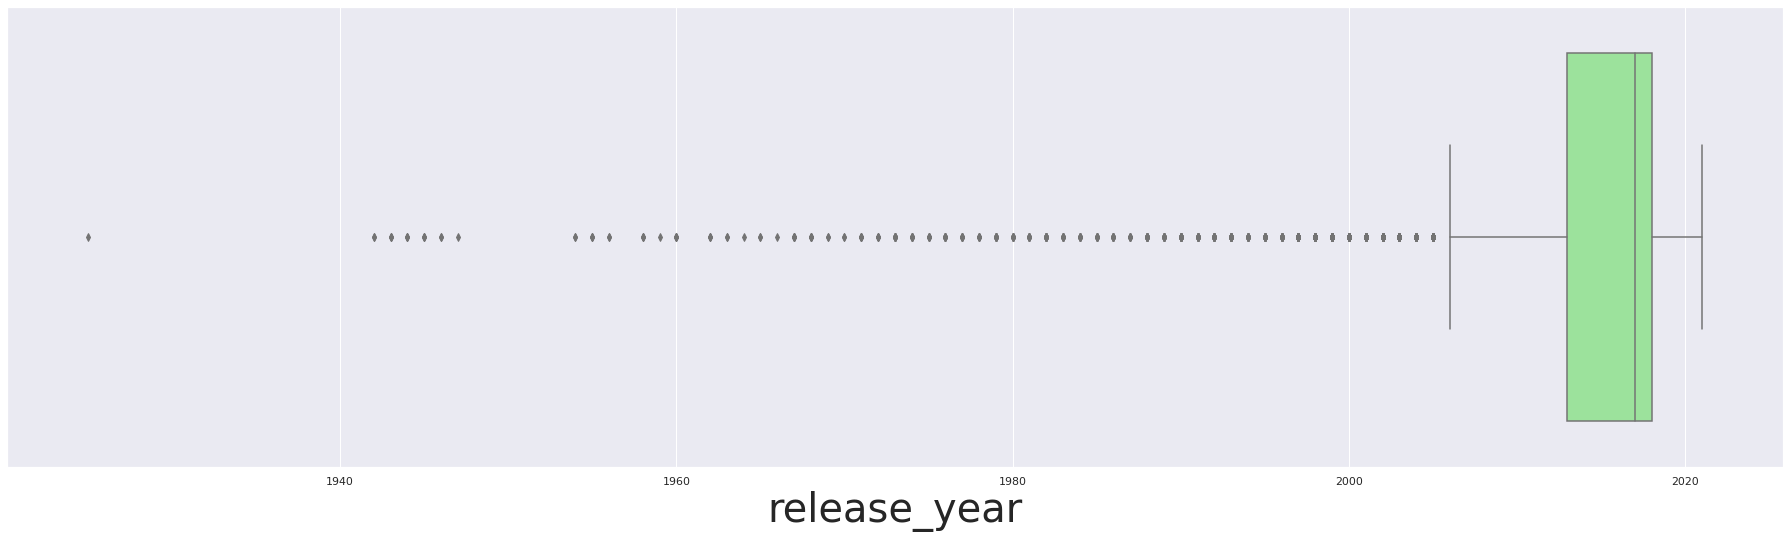

In [188]:
# Box plot to detect outliers

lst_box = df.describe().columns
plt.figure(figsize = (70,100))
sns.set_theme()
for i in enumerate(lst_box):
  plt.subplot(10, 2, i[0]+1)
  sns.set(font_scale = 2)
  sns.boxplot(df[i[1]], color= 'lightgreen')
  plt.xlabel(i[1], fontsize=40)

**Note: As we have seen earlier before 2014 the production growth for Movies & Tv Shows were very less, that's why it's showing those values(release_year less than 2009) as outliers.**

In [189]:
# Replacing outliers with mean value
release_year_Q1 = df.release_year.quantile(0.25)
release_year_Q3 = df.release_year.quantile(0.75)
release_year_IQR = release_year_Q3 - release_year_Q1
print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')

release_year_Q1 = 2013.0
release_year_Q3 = 2018.0
release_year_IQR = 5.0


In [190]:
release_year_outliers = df[(df.release_year < (release_year_Q1 - 1.5 * release_year_IQR)) |
                           ( df.release_year > (release_year_Q3 + 1.5 * release_year_IQR)) ]

In [191]:
# 15 percentile value is 2009
df["release_year"] = np.where(df["release_year"] <2009, df.release_year.mean(),df['release_year'])

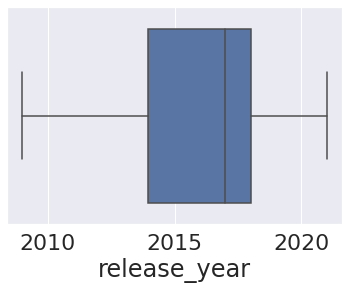

In [192]:
sns.boxplot(df.release_year)

## **Changing Dtypes of Columns**

In [193]:
# Changing the dtype of release_year column
df.release_year = df.release_year.astype("int64")

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   country       7770 non-null   object
 4   date_added    7770 non-null   object
 5   release_year  7770 non-null   int64 
 6   rating        7770 non-null   object
 7   duration      7770 non-null   object
 8   listed_in     7770 non-null   object
 9   description   7770 non-null   object
dtypes: int64(1), object(9)
memory usage: 667.7+ KB


# **4. Data Analysis and Visualization**

---



 **Most occured word in Title**

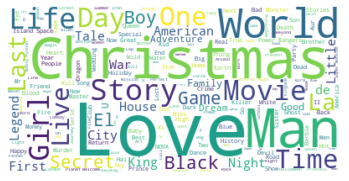

In [195]:
#subsetting df
df_wordcloud = df['title']
text = " ".join(word for word in df_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Inference:**

It seems like words like "Love", "Man", "World", "Story" , "Christmas" are very common in titles.

I have suprised to see "Christmas" ocurred so many time. The reason maybe those movies released on the month of december.

**Countries and Number of Netflix Productions**

In [196]:
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if isinstance(df['country'].iloc[i] , str):
    split=df['country'].iloc[i].split(',')
    for k in split:
      country_list.append(k.strip())
      if df['type'].iloc[i]=='TV Show':
        tv_show.append(k.strip())
      if df['type'].iloc[i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [197]:
# Creating a new DataFrame country_df
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies']) 
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)

In [198]:
#Top 5 countries
top_countries=country_df.head()
top_countries

,country,Productions,TV-Shows,Movies
0,United States,3793,1136,2657
1,India,990,75,915
2,United Kingdom,722,255,467
3,Canada,412,126,286
4,France,349,84,265


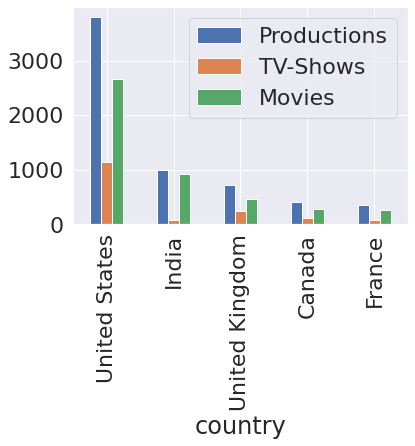

In [199]:
top_countries.head(9).plot(x="country", y=['Productions','TV-Shows','Movies'], kind="bar")

**Type of Netflix Content**

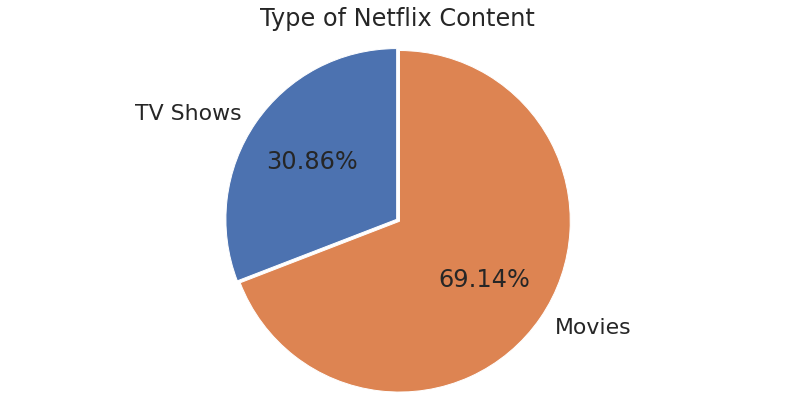

In [200]:
#Plotting pie chart on type feature
plt.figure(figsize=(14, 7))
labels=['TV Shows', 'Movies']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.01,0.01],
        autopct='%1.2f%%', startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

*  Most of the contents are Movies
*  Less than ⅓ content are Tv Shows

**Production Growth based on type of the content & release_year**

In [201]:
yearly_movies=df[df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearly_shows=df[df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=df['release_year'].value_counts().sort_index(ascending=False).head(15)

Text(0.5, 1.02, 'Production Growth Yearly')

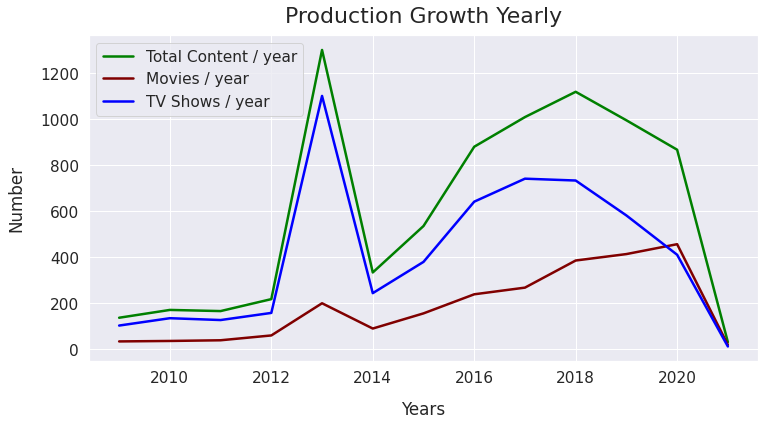

In [202]:
sns.set(font_scale=1.4)
total_content.plot(figsize=(12, 6), linewidth=2.5, color='green',label="Total Content / year")
yearly_movies.plot(figsize=(12, 6), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
yearly_shows.plot(figsize=(12, 6), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Production Growth Yearly", y=1.02, fontsize=22)

**Average Duration in Netflix**

In [203]:
df.duration.value_counts().to_frame().T

,1 Season,2 Seasons,3 Seasons,90 min,93 min,91 min,94 min,95 min,92 min,97 min,...,13 min,214 min,13 Seasons,9 min,312 min,182 min,224 min,37 min,233 min,191 min
duration,1606,378,183,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


**Define convert_seasons_to_min**

In [204]:
def convert_seasons_to_min(value):
  """
  This function will calculate no of total mins as per season no.
  Here our assumptions are
    1. on average 5 episodes are there in a season.
    2. each episode avg time is 55 mins.
  """
  no_of_avg_episode = 5
  if "Seasons" in value:
    #containing more than 1 seasons
    value = value.replace("Seasons",'')
    value = value.replace(" ","")
    total_seasons = int(value)
    each_season_mins = ( no_of_avg_episode * 55 )
    total_mins = (total_seasons * each_season_mins)
    return total_mins

  elif "Season" in value:
    # containing only 1 season
    value = value.replace("Season",'')
    value = value.replace(" ","")
    total_mins = (no_of_avg_episode * 55)
    return total_mins

In [205]:
#Checking the function
convert_seasons_to_min("4 Seasons")

1100

"4 Seasons" : 4 Seasons = (45) or 20 episodes 

Each episode avg. time is 55 mins.

Total time (in minutes. ) = (5520) min = 1100 mins 

**Define all the duration in minutes**

In [206]:
def all_the_duration_in_minutes():
  """
  This function will convert all the duration 
  whether it's in minutes or season format to minute
  """
  # replaced all the min with null string
  df['duration'] = df.duration.str.replace(" min" , "")
  # this time_list will contain all the value
  time_list =[]
  for time in df.duration.values:
    if "Season" in time:
      #time is containing Season
      # calling convert_seasons_to_min function to convert 
      # season to total min 
      time = convert_seasons_to_min(time)
    else:
      #replacing single space with ""
      time = time.replace(" ","")
    #appending time (it's not containing words like min or seasons)
    time_list.append(time)

  #converting all the time into integer format
  time_list = [ int(Time) for Time in time_list]

  #Assigning time_list to df.duration
  df.duration = time_list

In [207]:
df.duration.value_counts().to_frame().T

,1 Season,2 Seasons,3 Seasons,90 min,93 min,91 min,94 min,95 min,92 min,97 min,...,13 min,214 min,13 Seasons,9 min,312 min,182 min,224 min,37 min,233 min,191 min
duration,1606,378,183,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


In [208]:
all_the_duration_in_minutes()


In [209]:
df.duration.value_counts().to_frame().T

,275,550,825,90,93,91,94,95,92,97,...,13,214,3575,9,312,182,224,37,233,191
duration,1606,378,183,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


**Analysis on the duration of the Movies**

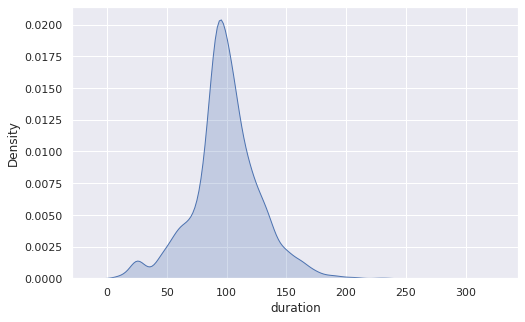

In [210]:
sns.set(style="darkgrid")
plt.figure(figsize = (8,5))
sns.kdeplot(data = df.duration[df['type'] == 'Movie'], shade=True)

*  Most content are about 70 to 120 min duration for movies

**Analysis on the duration of the TV-Shows**

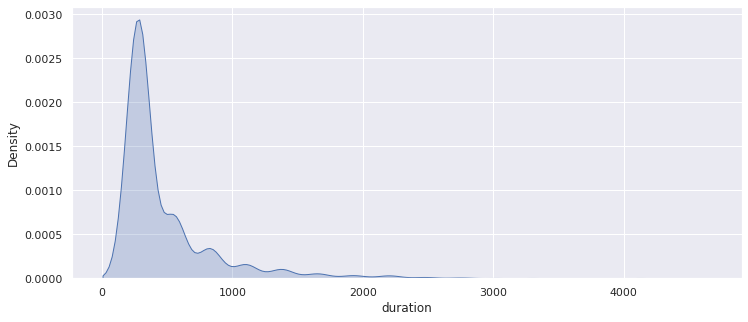

In [211]:
sns.set(style="darkgrid")
plt.figure(figsize = (12,5))
sns.kdeplot(data = df.duration[df['type'] == 'TV Show'] , shade=True)

In [212]:
df.listed_in.value_counts().to_frame().T

,Documentaries,Stand-Up Comedy,"Dramas, International Movies","Comedies, Dramas, International Movies","Dramas, Independent Movies, International Movies",Kids' TV,Children & Family Movies,"Documentaries, International Movies","Children & Family Movies, Comedies","Comedies, International Movies",...,"TV Horror, TV Mysteries, Teen TV Shows","Action & Adventure, International Movies, Thrillers","Anime Series, TV Horror, TV Thrillers","Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy","TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","Anime Series, Crime TV Shows, TV Thrillers","Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows","Crime TV Shows, International TV Shows, Reality TV","International Movies, Romantic Movies, Sci-Fi & Fantasy","International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows"
listed_in,334,321,320,243,215,204,177,172,169,161,...,1,1,1,1,1,1,1,1,1,1


In [213]:
categories = ", ".join(df['listed_in']).split(", ")
categories[:5]

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies']

In [214]:
print(len(categories))
print(len(set(categories)))

17042
42


There are 42 unique categories present & in this dataset all the categories occured in total 17051 times

Creating a dictionary ( category_wise_count ) where for each category there will be a value which basically tells us how many times that particular category occured

In [215]:
category_wise_count = {}
for category in set(categories):
  category_wise_count[category] = categories.count(category)

In [216]:
category_wise_count

{'International TV Shows': 1197,
 'Spanish-Language TV Shows': 146,
 'TV Action & Adventure': 149,
 'TV Shows': 12,
 'Movies': 52,
 'TV Comedies': 517,
 'Reality TV': 222,
 'Independent Movies': 673,
 'Classic Movies': 103,
 'Documentaries': 786,
 'Horror Movies': 312,
 'Romantic Movies': 531,
 'Dramas': 2105,
 'TV Mysteries': 90,
 'Crime TV Shows': 426,
 "Kids' TV": 411,
 'Children & Family Movies': 532,
 'Action & Adventure': 721,
 'TV Sci-Fi & Fantasy': 75,
 'Thrillers': 491,
 'TV Horror': 69,
 'TV Thrillers': 50,
 'Stand-Up Comedy': 329,
 'LGBTQ Movies': 90,
 'Faith & Spirituality': 57,
 'Korean TV Shows': 150,
 'Cult Movies': 59,
 'Comedies': 1471,
 'Romantic TV Shows': 333,
 'International Movies': 2437,
 'Sports Movies': 196,
 'TV Dramas': 703,
 'Music & Musicals': 321,
 'Anime Features': 57,
 'Stand-Up Comedy & Talk Shows': 52,
 'Science & Nature TV': 85,
 'Classic & Cult TV': 25,
 'Anime Series': 146,
 'Docuseries': 352,
 'Sci-Fi & Fantasy': 218,
 'Teen TV Shows': 60,
 'Britis

**Sorting category_wise_count by value**

In [217]:
sorted_category_wise_count = sorted(category_wise_count.items(), key=lambda x: x[1])
sorted_category_wise_count[:4]

[('TV Shows', 12),
 ('Classic & Cult TV', 25),
 ('TV Thrillers', 50),
 ('Movies', 52)]

**Top 5 least occurred category**

In [218]:
sorted_category_wise_count[:5]

[('TV Shows', 12),
 ('Classic & Cult TV', 25),
 ('TV Thrillers', 50),
 ('Movies', 52),
 ('Stand-Up Comedy & Talk Shows', 52)]

**Top 10 most occurred categories**

In [219]:
top_10_most_occurred_categories = sorted_category_wise_count[-10:]
top_10_most_occurred_categories

[('Romantic Movies', 531),
 ('Children & Family Movies', 532),
 ('Independent Movies', 673),
 ('TV Dramas', 703),
 ('Action & Adventure', 721),
 ('Documentaries', 786),
 ('International TV Shows', 1197),
 ('Comedies', 1471),
 ('Dramas', 2105),
 ('International Movies', 2437)]

In [220]:
top_10_most_occurred_category_name = []
top_10_most_occurred_category_count = []
for tup in top_10_most_occurred_categories:
  top_10_most_occurred_category_name.append(tup[0])
  top_10_most_occurred_category_count.append(tup[1])

top_10_most_occurred_category_name

['Romantic Movies',
 'Children & Family Movies',
 'Independent Movies',
 'TV Dramas',
 'Action & Adventure',
 'Documentaries',
 'International TV Shows',
 'Comedies',
 'Dramas',
 'International Movies']

In [221]:
top_10_most_occurred_category_count

[531, 532, 673, 703, 721, 786, 1197, 1471, 2105, 2437]

<Figure size 1152x576 with 0 Axes>

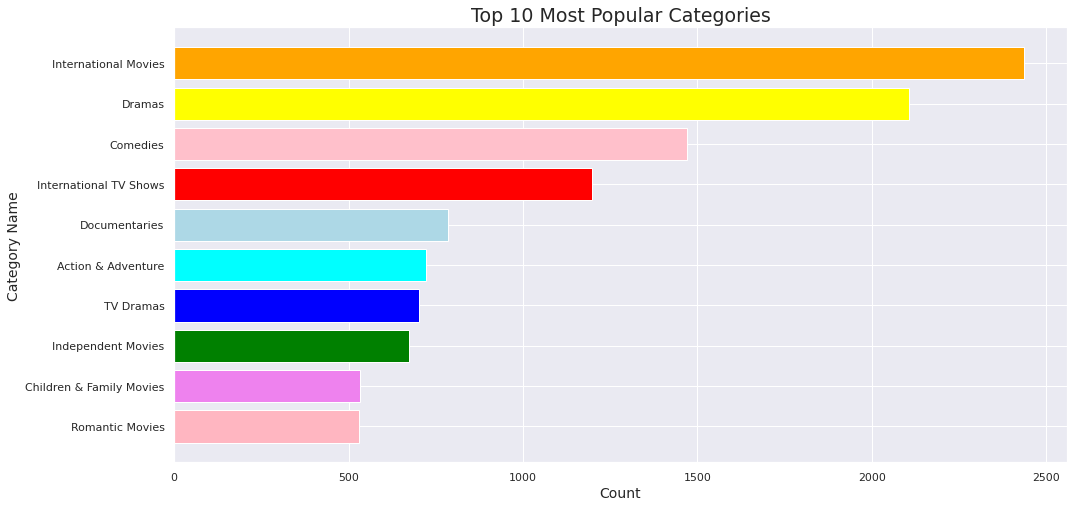

<Figure size 1152x576 with 0 Axes>

In [222]:
plt.figure( figsize = (16,8))
color=['lightpink', 'violet', 'green', 'blue', 'cyan' , "lightblue" ,'red', 'pink', 'yellow', 'orange']
plt.barh(top_10_most_occurred_category_name , top_10_most_occurred_category_count ,
        color= color)
plt.title("Top 10 Most Popular Categories",fontsize = 19)
plt.xlabel("Count", fontsize = 14 )
plt.ylabel("Category Name" , fontsize = 14 )
plt.figure( figsize = (16,8))

**Creating a new column no_of_category**

In [223]:
# Datatype of listed_in values
type(df.listed_in.iloc[0])

str

In [224]:
(df.listed_in.iloc[0])

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [225]:
(df.listed_in.iloc[0]).split(",")

['International TV Shows', ' TV Dramas', ' TV Sci-Fi & Fantasy']

In [226]:
len((df.listed_in.iloc[0]).split(","))

3

In [227]:
no_of_category = []
for categories in df.listed_in.values:
  len_categories = len(categories.split(","))
  no_of_category.append(len_categories)

In [228]:
df['no_of_category'] = no_of_category

In [229]:
df[['listed_in' , 'no_of_category']].head()

,listed_in,no_of_category
0,"International TV Shows, TV Dramas, TV Sci-Fi &...",3
1,"Dramas, International Movies",2
2,"Horror Movies, International Movies",2
3,"Action & Adventure, Independent Movies, Sci-Fi...",3
4,Dramas,1


Text(0, 0.5, 'Count')

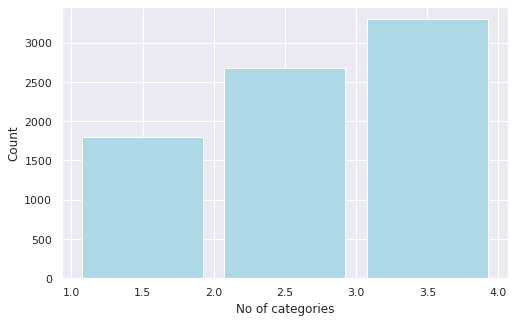

In [230]:
sns.set(style="darkgrid")
plt.figure(figsize = (8,5))
plt.hist(df.no_of_category , bins=[1,2,3,4] , range = (1 ,4) , rwidth = 0.85, color ='lightblue')
plt.xlabel("No of categories")
plt.ylabel("Count")

**Creating a new column date_added_month using date_added column**

In [231]:
df.date_added.head(3)

0      August 14, 2020
1    December 23, 2016
2    December 20, 2018
Name: date_added, dtype: object

In [232]:
df['date_added_month'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df[['date_added' , 'date_added_month']].head()

,date_added,date_added_month
0,"August 14, 2020",August
1,"December 23, 2016",December
2,"December 20, 2018",December
3,"November 16, 2017",November
4,"January 1, 2020",January


In [233]:
month_df=df['date_added_month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'month': 'Count'}, inplace=True)
ab = month_df.loc[0:11]
ab

,Month_Name,date_added_month
0,December,816
1,October,780
2,January,745
3,November,730
4,March,660
5,September,613
6,August,611
7,April,595
8,July,592
9,June,538


In [234]:
month_names = ab.Month_Name.values
month_wise_count = ab.date_added_month.values

Text(0, 0.5, 'Count')

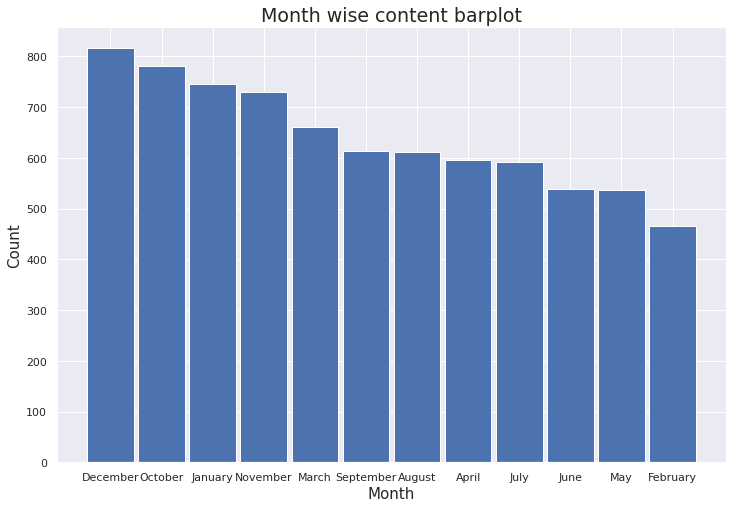

In [235]:
plt.figure(figsize = (12 ,8 ))
plt.bar(month_names , month_wise_count, width = 0.91)
plt.title("Month wise content barplot" , fontsize = 19)
plt.xlabel("Month" , fontsize = 15)
plt.ylabel("Count" , fontsize = 15)

We can say that December is the holiday season and it also has Christmas, so in that month most of the content got uploaded

**Most popular TV-Shows Rating**

In [236]:
df_tv_show = df[df['type']== 'TV Show' ]
df_tv_show.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,3,August
5,s6,TV Show,46,Turkey,"July 1, 2017",2016,TV-MA,275,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,3,July


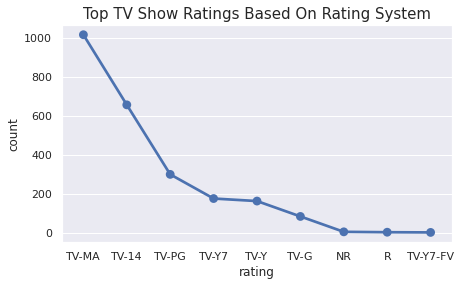

In [237]:
#Pointplot on top tv show ratings 
tv_ratings = df_tv_show.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (7,4)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='15')
plt.show()

Most of the TV Shows contents got ratings like

*  TV-MA ( For Mature Audiences)

*  TV-14 ( Unsuitable for children under age 14 )

*  TV-PG ( Parental Guidance Suggested )

**Most popular Movies Rating**

In [238]:
df_movies = df[df['type'] == 'Movie' ]
df_movies.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2,December


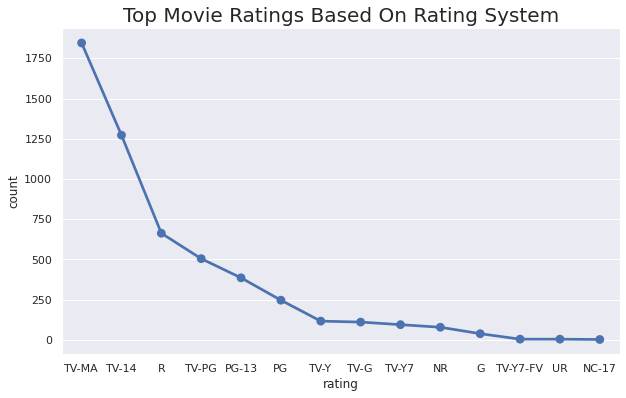

In [239]:

#Pointplot on top tv show ratings 
tv_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (10,6)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

Most of the Movies content got ratings like

*  TV-MA ( For Mature Audiences)
*  TV-14 ( Unsuitable for children under age 14 )
*  R ( Restrited for child)
*  TV-PG ( Parental Guidance Suggested )

# **5. Data Preparation for NLP**


---



### **Description feature**

In [240]:
df.description.iloc[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

**Download nltk**

In [241]:

import nltk 
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

True

**Removing Punctuations**

In [242]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [243]:
df['description'] = df['description'].apply(remove_punctuation)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,3,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",When an army recruit is found dead his fellow ...,2,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",In a postapocalyptic world ragdoll robots hide...,3,November
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123,Dramas,A brilliant group of students become cardcount...,1,January


**Removing Stopwords**

In [244]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [245]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')

# displaying the stopwords
for i in sw:
  print(i , end=',  ')

i,  me,  my,  myself,  we,  our,  ours,  ourselves,  you,  you're,  you've,  you'll,  you'd,  your,  yours,  yourself,  yourselves,  he,  him,  his,  himself,  she,  she's,  her,  hers,  herself,  it,  it's,  its,  itself,  they,  them,  their,  theirs,  themselves,  what,  which,  who,  whom,  this,  that,  that'll,  these,  those,  am,  is,  are,  was,  were,  be,  been,  being,  have,  has,  had,  having,  do,  does,  did,  doing,  a,  an,  the,  and,  but,  if,  or,  because,  as,  until,  while,  of,  at,  by,  for,  with,  about,  against,  between,  into,  through,  during,  before,  after,  above,  below,  to,  from,  up,  down,  in,  out,  on,  off,  over,  under,  again,  further,  then,  once,  here,  there,  when,  where,  why,  how,  all,  any,  both,  each,  few,  more,  most,  other,  some,  such,  no,  nor,  not,  only,  own,  same,  so,  than,  too,  very,  s,  t,  can,  will,  just,  don,  don't,  should,  should've,  now,  d,  ll,  m,  o,  re,  ve,  y,  ain,  aren,  

In [246]:
print("Number of stopwords in english : ", len(sw))

Number of stopwords in english :  179


In [247]:
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [248]:
df['description'] = df['description'].apply( remove_stopwords )
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,3,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,2,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,3,November
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123,Dramas,brilliant group students become cardcounting e...,1,January


Now all the values of description are punctutation free and stopword free

**Using CountVectorizer() to count vocabulary items**

In [249]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [250]:
len(dictionary)

19586

In [251]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

**Creating a new DataFrame vocab_before_stemming**

In [252]:
# Store the count in panadas dataframe with vocab as index
vocab_before_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)

**TOP 5 least occurred words**

In [253]:
vocab_before_stemming.tail(5).T

,8311,639,7608,7954,6859
Word,1000,100,10,009,007
count,4,3,2,1,0


**TOP 10 most occurred words**

In [254]:
vocab_before_stemming.head(10).T

,18845,10379,12367,11090,11662,13273,6576,18183,10417,9859
Word,şeref,ōarai,łukasz,überelite,über,ömer,émile,ángel,álvaro,álex
count,19585,19584,19583,19582,19581,19580,19579,19578,19577,19576


In [255]:
top10_most_ocurred_vacab = vocab_before_stemming.head(10)

In [256]:
top10_most_occurred_words = top10_most_ocurred_vacab.Word.values 
top10_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelite', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex'], dtype=object)

In [257]:
top10_most_occurred_words_count = top10_most_ocurred_vacab['count'].values 
top10_most_occurred_words_count

array([19585, 19584, 19583, 19582, 19581, 19580, 19579, 19578, 19577,
       19576])

<BarContainer object of 10 artists>

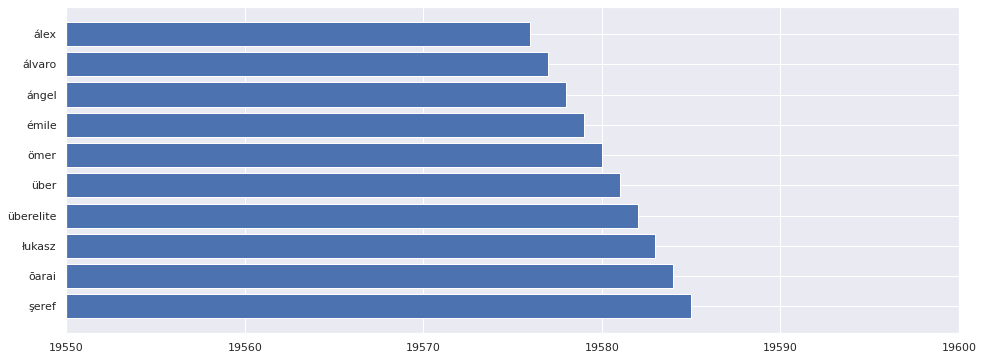

In [258]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(19550, 19600)
plt.barh(top10_most_occurred_words , top10_most_occurred_words_count )

**Now will use SnowballStemmer( 'english' )**

In [259]:
# Create an object of stemming function
stemmer = SnowballStemmer("english")

In [260]:
def Apply_stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [261]:
#Stemming for description
df['description'] = df['description'].apply( Apply_stemming )
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,3,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,3,November
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123,Dramas,brilliant group student becom cardcount expert...,1,January


**Now again will use Tfidf Vectorizer (after stemming)**

In [262]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [263]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []

# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

**Creating a new DataFrame vocab_after_stemming**

In [264]:
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

In [265]:
top10_most_ocurred_vocab = vocab_after_stemming.head(10)

In [266]:
top10_most_occurred_words = top10_most_ocurred_vocab.Word.values 
top10_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelit', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex'], dtype=object)

In [267]:
top10_most_occurred_words_count = top10_most_ocurred_vocab['count'].values 
top10_most_occurred_words_count

array([14233, 14232, 14231, 14230, 14229, 14228, 14227, 14226, 14225,
       14224])

<BarContainer object of 10 artists>

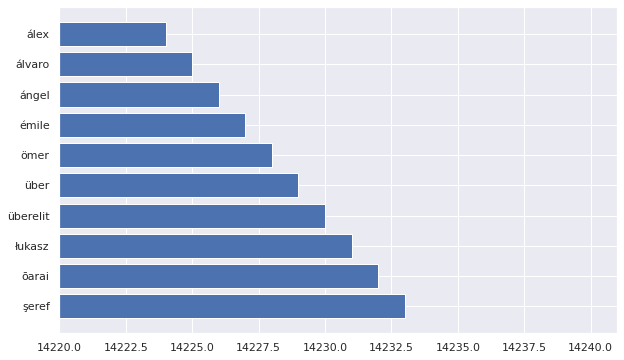

In [268]:
plt.figure( figsize = ( 10,6 ))
plt.xlim(14220, 14241)
plt.barh(top10_most_occurred_words , top10_most_occurred_words_count )

**Adding a new column length which will contain length of description**

In [269]:
df['Length(description)'] = df['description'].apply(lambda x: len(x))

In [270]:
df.head(3)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2,December,88
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2,December,102


## **listed_in Feature**

In [271]:
# Removing punctutations
df['listed_in'] = df['listed_in'].apply(remove_punctuation)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,International TV Shows TV Dramas TV SciFi Fan...,futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,Dramas International Movies,devast earthquak hit mexico citi trap survivor...,2,December,88
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,Horror Movies International Movies,armi recruit found dead fellow soldier forc co...,2,December,102
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80,Action Adventure Independent Movies SciFi Fa...,postapocalypt world ragdol robot hide fear dan...,3,November,89
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123,Dramas,brilliant group student becom cardcount expert...,1,January,99


In [272]:
#Remove stopwords for listed_in
df['listed_in'] = df['listed_in'].apply( remove_stopwords )
df.head( 2 )

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,international tv shows tv dramas tv scifi fantasy,futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,dramas international movies,devast earthquak hit mexico citi trap survivor...,2,December,88


**Using CountVectorizer() to count vocabulary items**

In [273]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['listed_in'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [274]:
dictionary

dict_items([('international', 19), ('tv', 41), ('shows', 33), ('dramas', 12), ('scifi', 31), ('fantasy', 15), ('movies', 23), ('horror', 17), ('action', 0), ('adventure', 1), ('independent', 18), ('mysteries', 26), ('thrillers', 40), ('crime', 8), ('docuseries', 11), ('documentaries', 10), ('sports', 36), ('comedies', 6), ('anime', 2), ('series', 32), ('reality', 28), ('romantic', 29), ('science', 30), ('nature', 27), ('british', 3), ('korean', 21), ('music', 24), ('musicals', 25), ('lgbtq', 22), ('faith', 13), ('spirituality', 35), ('kids', 20), ('spanishlanguage', 34), ('children', 4), ('family', 14), ('classic', 5), ('cult', 9), ('standup', 37), ('comedy', 7), ('talk', 38), ('teen', 39), ('features', 16)])

In [275]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

In [276]:
listed_in_vocab_before_stem = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})

listed_in_vocab_before_stem = listed_in_vocab_before_stem.sort_values("count" ,ascending=False)

In [277]:
listed_in_vocab_before_stem.tail()

,Word,count
33,children,4
24,british,3
18,anime,2
9,adventure,1
8,action,0


In [278]:
listed_in_vocab_before_stem.head()

,Word,count
1,tv,41
12,thrillers,40
40,teen,39
39,talk,38
37,standup,37


**TOP 10 most occurred words in listed in**

In [279]:
top10_most_ocurred_vocab_listed_in = listed_in_vocab_before_stem.head(10)

In [280]:
top10_most_ocurred_words_listed_in = top10_most_ocurred_vocab_listed_in.Word.values 
top10_most_ocurred_words_listed_in

array(['tv', 'thrillers', 'teen', 'talk', 'standup', 'sports',
       'spirituality', 'spanishlanguage', 'shows', 'series'], dtype=object)

In [281]:
top10_most_occurred_words_in_listed_in_count = top10_most_ocurred_vocab_listed_in['count'].values 
top10_most_occurred_words_in_listed_in_count

array([41, 40, 39, 38, 37, 36, 35, 34, 33, 32])

<BarContainer object of 10 artists>

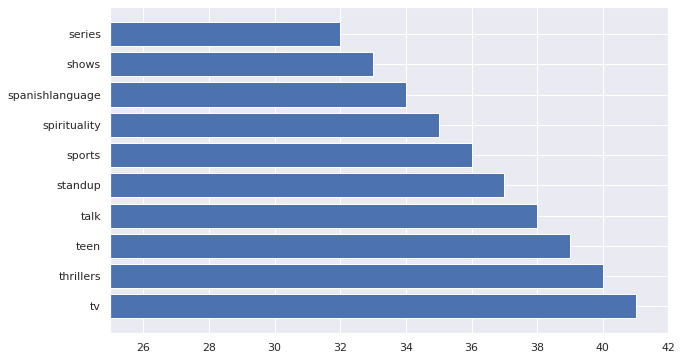

In [282]:
plt.figure( figsize = ( 10,6 ))
plt.xlim(25, 42 )
plt.barh(top10_most_ocurred_words_listed_in , top10_most_occurred_words_in_listed_in_count )

**Now will use SnowballStemmer( 'english' )**

In [283]:
#Stemming for description
df['listed_in'] = df['listed_in'].apply( Apply_stemming )
df.head(3)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,drama intern movi,devast earthquak hit mexico citi trap survivor...,2,December,88
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2,December,102


**Now will use TfidfVectorizer (after stemming)**

In [284]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['listed_in'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [285]:
dictionary

dict_items([('intern', 18), ('tv', 39), ('show', 31), ('drama', 11), ('scifi', 29), ('fantasi', 14), ('movi', 22), ('horror', 16), ('action', 0), ('adventur', 1), ('independ', 17), ('mysteri', 24), ('thriller', 38), ('crime', 7), ('docuseri', 10), ('documentari', 9), ('sport', 34), ('comedi', 6), ('anim', 2), ('seri', 30), ('realiti', 26), ('romant', 27), ('scienc', 28), ('natur', 25), ('british', 3), ('korean', 20), ('music', 23), ('lgbtq', 21), ('faith', 12), ('spiritu', 33), ('kid', 19), ('spanishlanguag', 32), ('children', 4), ('famili', 13), ('classic', 5), ('cult', 8), ('standup', 35), ('talk', 36), ('teen', 37), ('featur', 15)])

In [286]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

**Creating a new DataFrame vocab_after_stemming_listed_in**

In [287]:
vocab_after_stemming_listed_in = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})
# Sort the dataframe by count
vocab_after_stemming_listed_in = vocab_after_stemming_listed_in.sort_values("count" ,ascending=False)

In [288]:
top10_most_ocurred_vocab_lised_in_after_stem = vocab_after_stemming_listed_in.head(10)

In [289]:
top10_most_ocurred_vocab_lised_in_after_stem_word = top10_most_ocurred_vocab_lised_in_after_stem.Word.values 
top10_most_ocurred_vocab_lised_in_after_stem_word

array(['tv', 'thriller', 'teen', 'talk', 'standup', 'sport', 'spiritu',
       'spanishlanguag', 'show', 'seri'], dtype=object)

In [290]:
top10_most_occurred_words_listed_in_count = top10_most_ocurred_vocab_lised_in_after_stem['count'].values 
top10_most_occurred_words_listed_in_count

array([39, 38, 37, 36, 35, 34, 33, 32, 31, 30])

<BarContainer object of 10 artists>

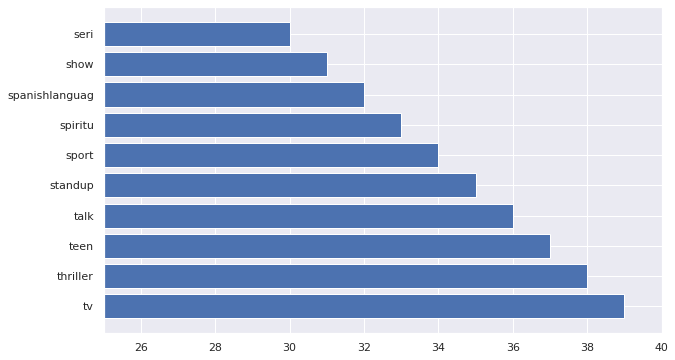

In [291]:
plt.figure( figsize = ( 10,6 ))
plt.xlim(25, 40 )
plt.barh(top10_most_ocurred_vocab_lised_in_after_stem_word , top10_most_occurred_words_listed_in_count )

**Adding a new column length( listed-in ) which will contain length of listed_in**

In [292]:
df['Length(listed-in)'] = df['listed_in'].apply(lambda x: len(x))
df.head(3)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description),Length(listed-in)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,3,August,82,40
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,drama intern movi,devast earthquak hit mexico citi trap survivor...,2,December,88,17
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2,December,102,23


In [293]:
df[['description', 'Length(description)', 'listed_in' ,'Length(listed-in)' ]].head(3)

,description,Length(description),listed_in,Length(listed-in)
0,futur elit inhabit island paradis far crowd sl...,82,intern tv show tv drama tv scifi fantasi,40
1,devast earthquak hit mexico citi trap survivor...,88,drama intern movi,17
2,armi recruit found dead fellow soldier forc co...,102,horror movi intern movi,23


# **6. Applying Different Clustering Algorithms**


---



**Clustering: -**
Clustering can be considered the most important unsupervised learning problem; so, as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data.A loose definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”. A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters.

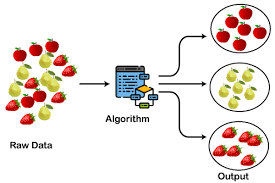

**Five Clustering algorithm I have used here are:**
1. Silhouette score
2. Elbow Method
3. DBSCAN
4. Dendrogram
5. Agglomerative Clustering

## **1. Silhouette score**

The **Silhouette score** is used to measure the degree of separation between clusters. In the formula above bi represents the shortest mean distance between a point to all points in any other cluster of which i is not a part whereas ai is the mean distance of i and all data points from the same cluster.

In [294]:
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'no_of_category',
       'date_added_month', 'Length(description)', 'Length(listed-in)'],
      dtype='object')

In [295]:
X_features_rec = df[['no_of_category' ,'Length(description)','Length(listed-in)']]
stdscaler = preprocessing.StandardScaler()

In [296]:
X_features_rec.describe()

,no_of_category,Length(description),Length(listed-in)
count,7770.000000,7770.000000,7770.000000
mean,2.193308,93.012484,24.342085
std,0.785836,10.775430,10.677661
min,1.000000,25.000000,4.000000
25%,2.000000,87.000000,17.000000
50%,2.000000,93.000000,24.000000
75%,3.000000,100.000000,32.000000
max,3.000000,185.000000,62.000000


In [297]:
X_rescale=stdscaler.fit_transform(X_features_rec)
X=X_rescale
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]

In [298]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.42843328899854627
For n_clusters = 3, silhouette score is 0.3832991558393045
For n_clusters = 4, silhouette score is 0.37431547662296216
For n_clusters = 5, silhouette score is 0.3720843918336816
For n_clusters = 6, silhouette score is 0.3681694950084983
For n_clusters = 7, silhouette score is 0.37602617026863216
For n_clusters = 8, silhouette score is 0.3707733418425295
For n_clusters = 9, silhouette score is 0.374851392272243
For n_clusters = 10, silhouette score is 0.36498814933847673
For n_clusters = 11, silhouette score is 0.3550141388753564
For n_clusters = 12, silhouette score is 0.35603443741588864
For n_clusters = 13, silhouette score is 0.3497366048331119
For n_clusters = 14, silhouette score is 0.3437866138686444
For n_clusters = 15, silhouette score is 0.3427424627239503


In [299]:
temp = pd.DataFrame(silhouette_score_ , columns = ["n clusters" , "silhouette score"])
temp = temp.sort_values( "silhouette score" , ascending = False )
temp.head(14)

,n clusters,silhouette score
0,2,0.428
1,3,0.383
5,7,0.376
7,9,0.375
2,4,0.374
3,5,0.372
6,8,0.371
4,6,0.368
8,10,0.365
10,12,0.356


**NOTE :-**
The value of the silhouette coefﬁcient is between [-1, 1]. A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters

For n_clusters = 2 The average silhouette_score is : 0.42843328899854627
For n_clusters = 3 The average silhouette_score is : 0.3832991558393045
For n_clusters = 4 The average silhouette_score is : 0.37431547662296216
For n_clusters = 5 The average silhouette_score is : 0.3720843918336816
For n_clusters = 6 The average silhouette_score is : 0.3683935727757619
For n_clusters = 7 The average silhouette_score is : 0.3759188611985892
For n_clusters = 8 The average silhouette_score is : 0.3529435800136665
For n_clusters = 9 The average silhouette_score is : 0.37355481904677795
For n_clusters = 10 The average silhouette_score is : 0.36466585189849926
For n_clusters = 11 The average silhouette_score is : 0.3556771542933465
For n_clusters = 12 The average silhouette_score is : 0.354922889695617
For n_clusters = 13 The average silhouette_score is : 0.3510103258811644
For n_clusters = 14 The average silhouette_score is : 0.3479317051389534
For n_clusters = 15 The average silhouette_score is : 0.

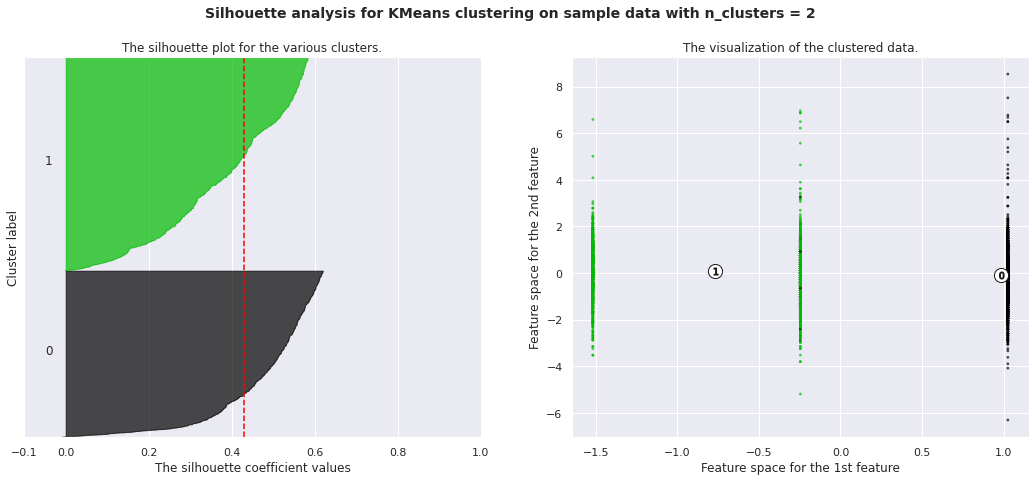

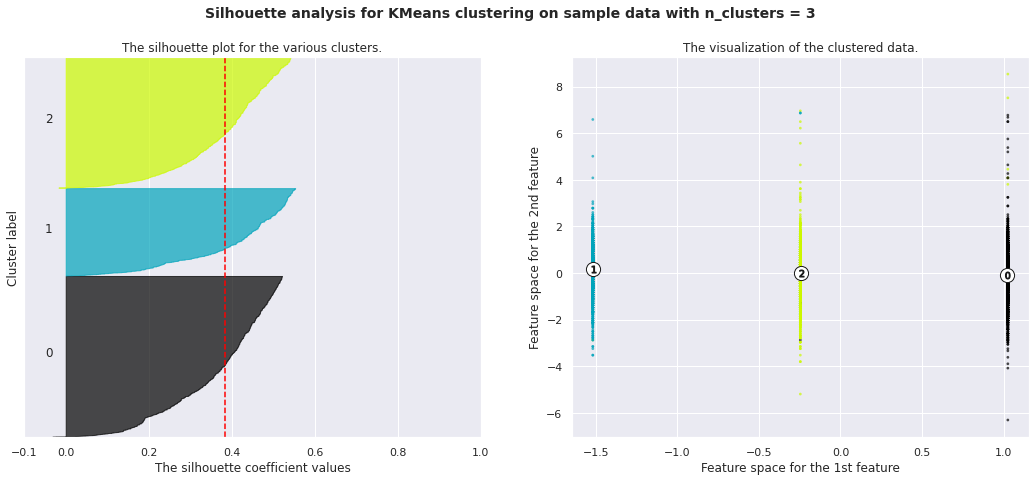

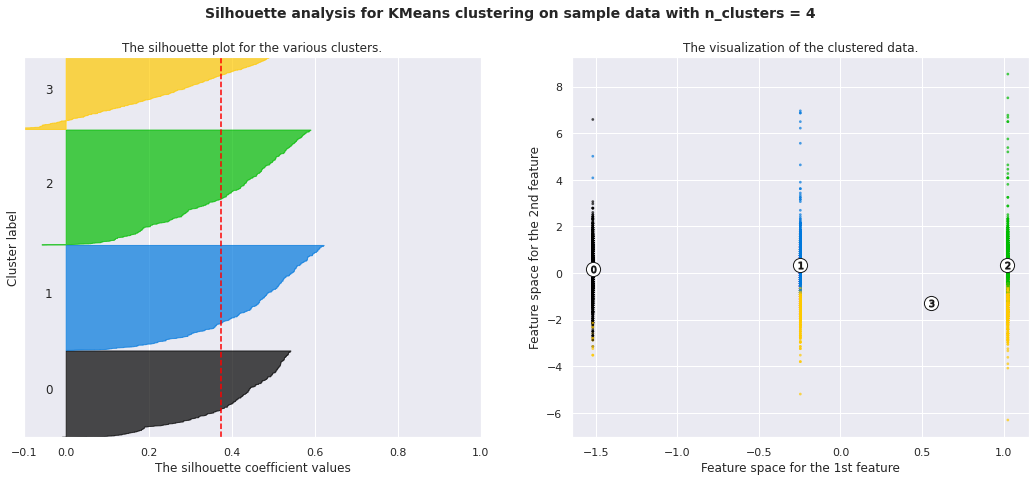

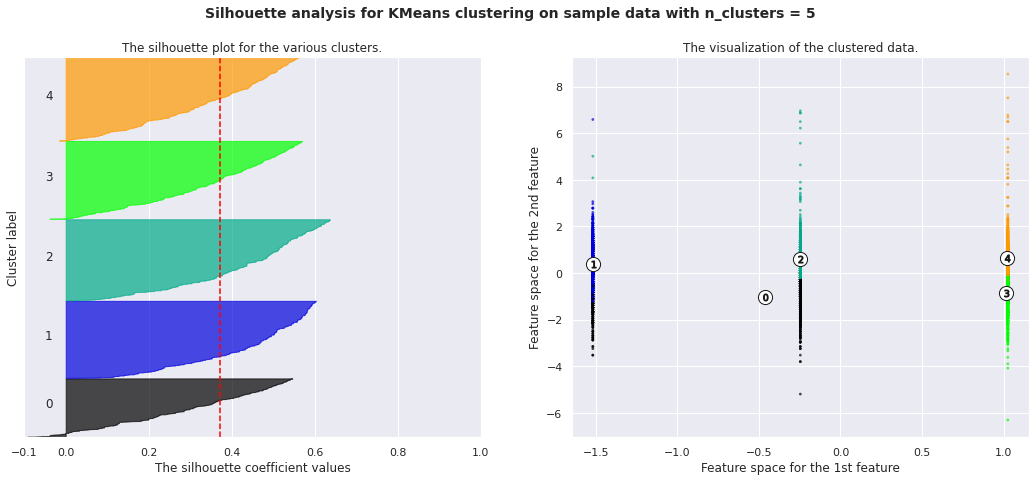

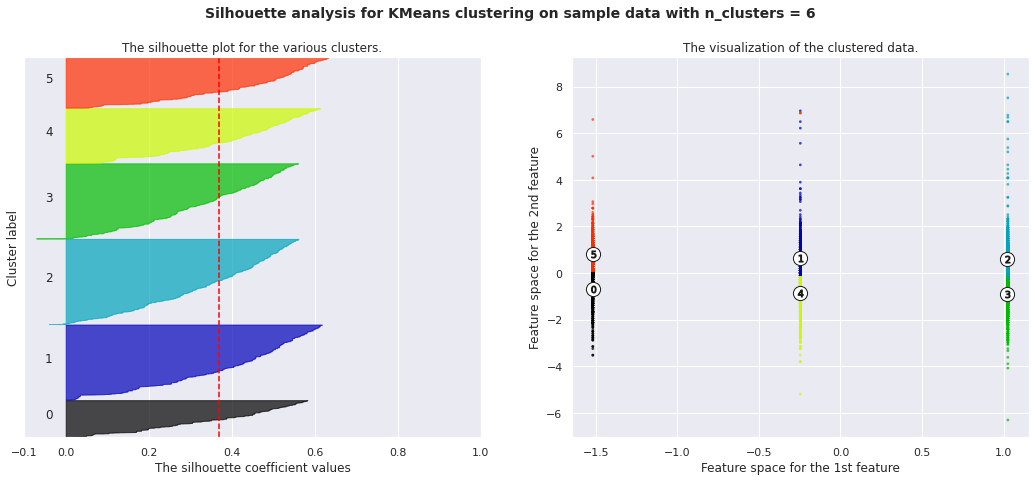

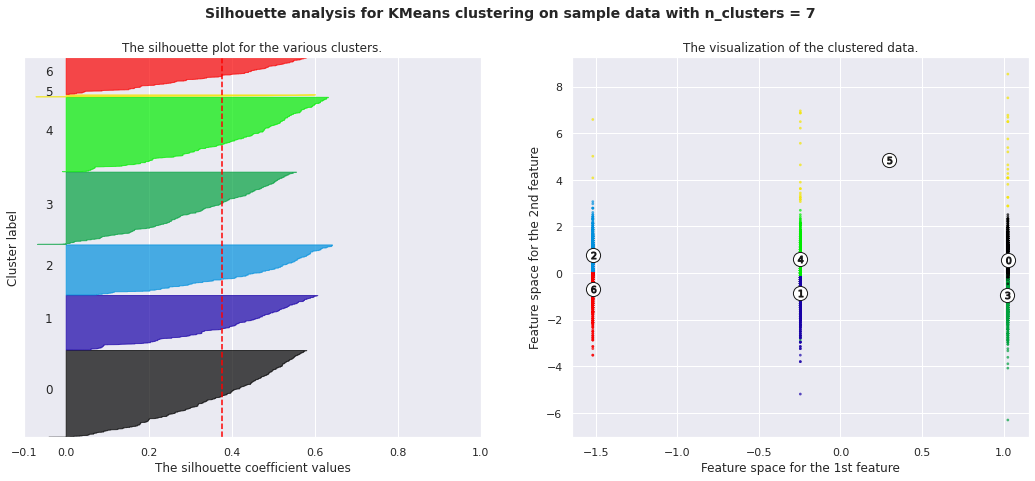

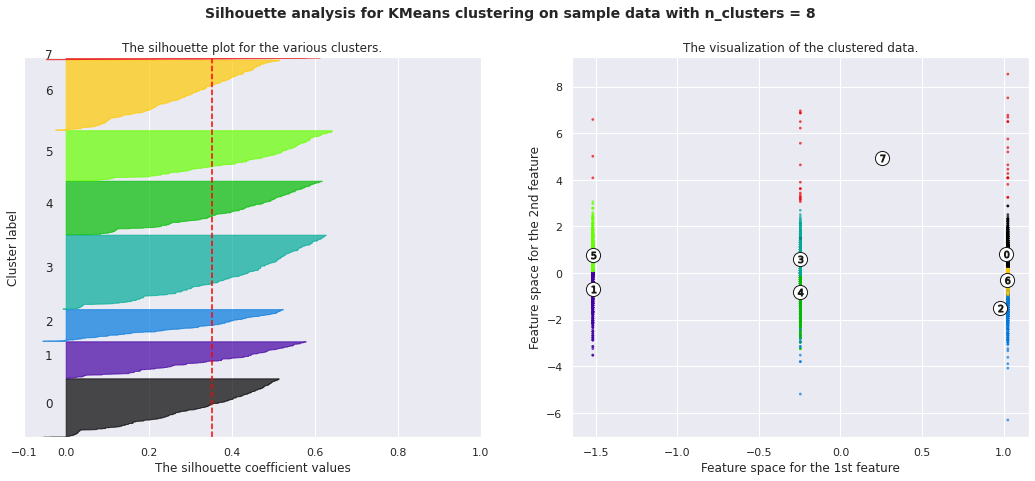

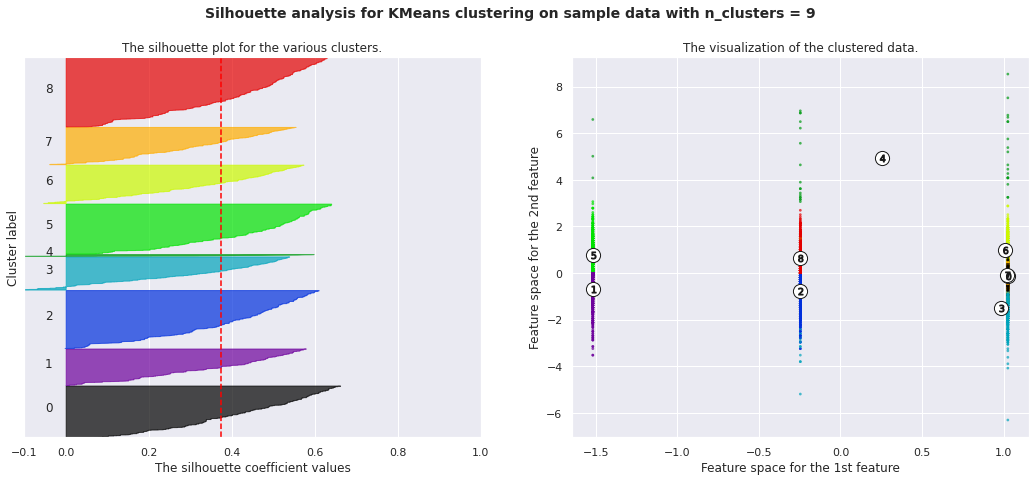

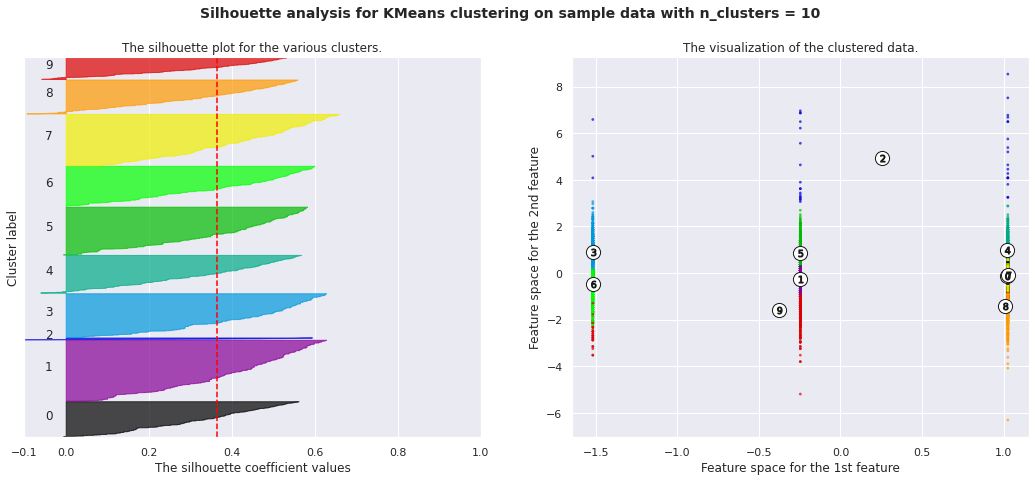

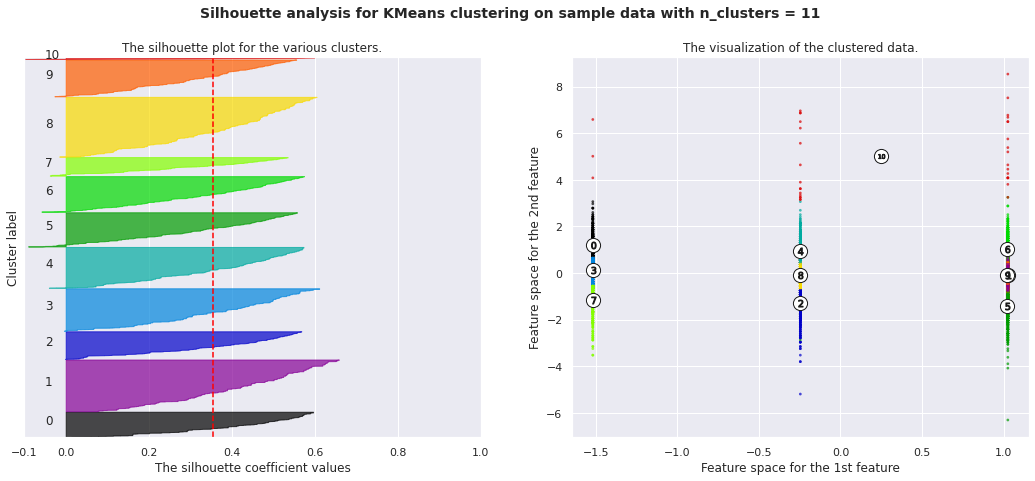

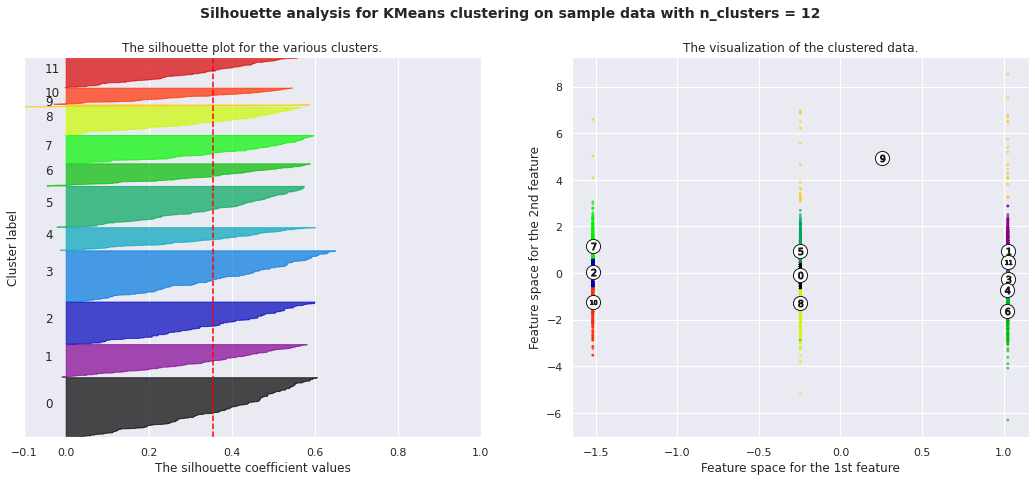

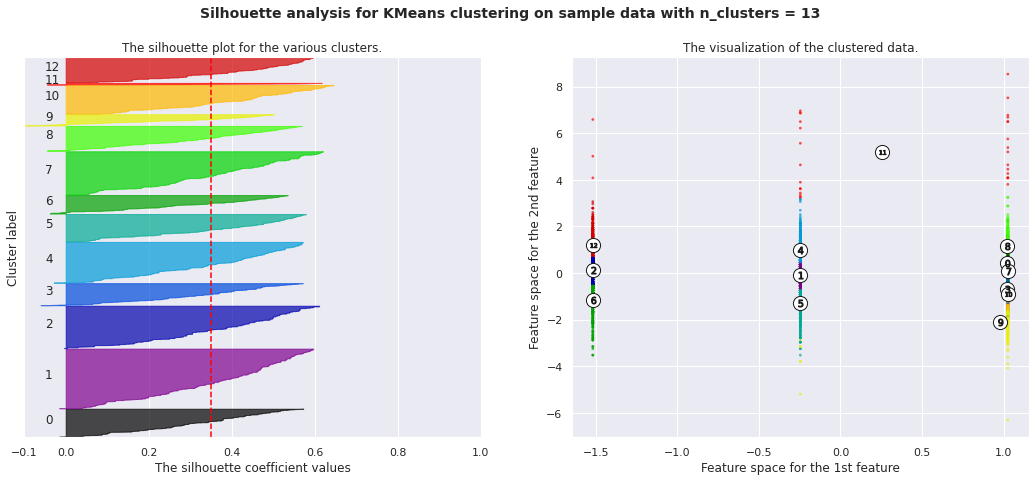

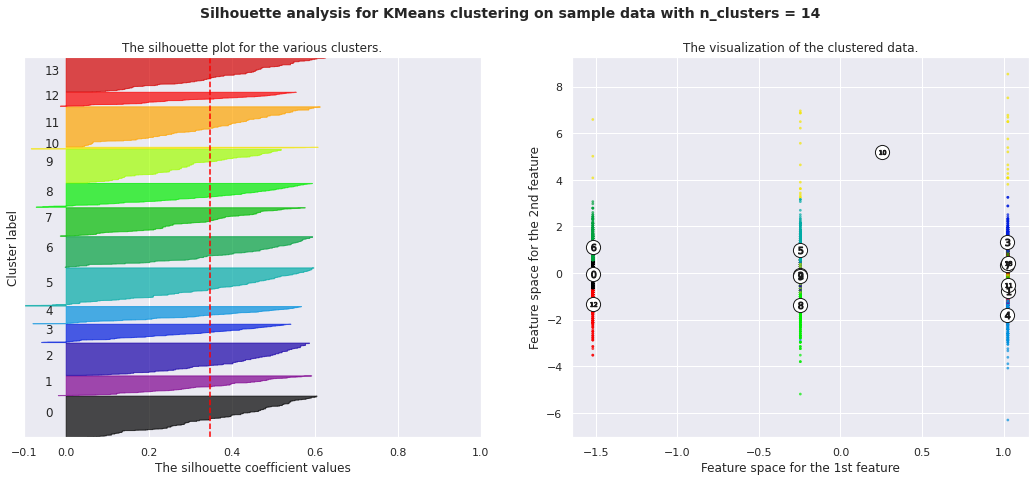

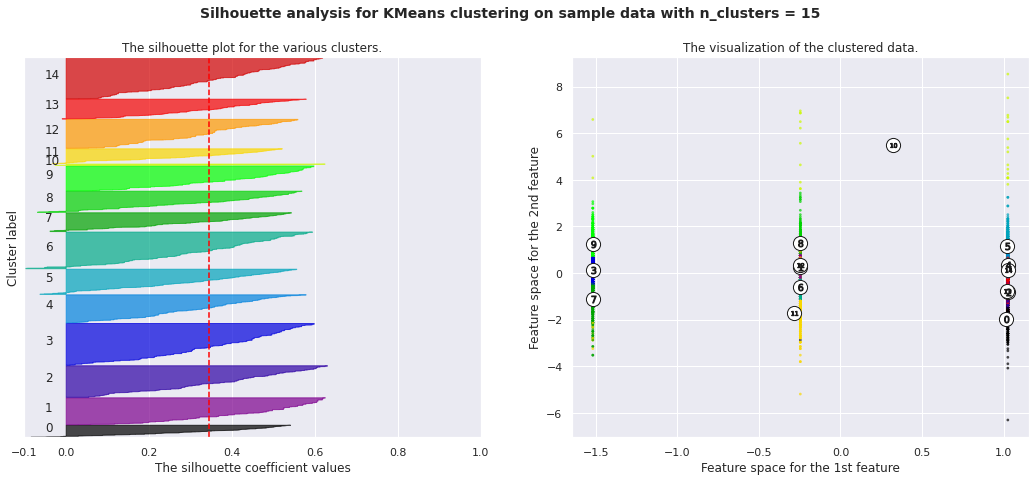

In [300]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

* Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.

* Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

The Silhouette Coefficient for a sample is (b - a) / max(a, b).

## **2. Elbow Method**

The **Elbow Method** is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

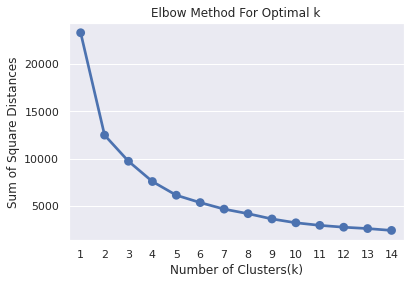

In [301]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**Note** : We will be using 3 clusters

In [302]:
kmeans = KMeans(n_clusters = 3 )
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

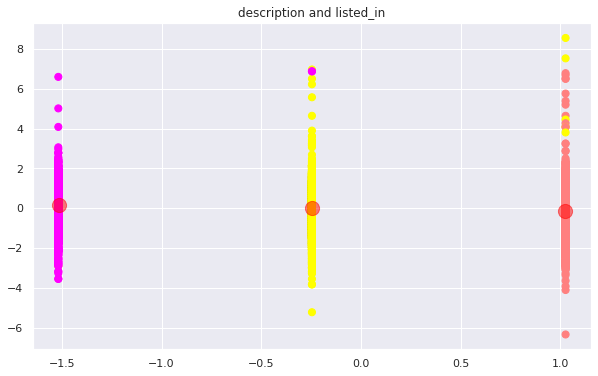

In [303]:
plt.figure(figsize=(10 , 6))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

## **3. DBSCAN**

**DBSCAN** stands for density-based spatial clustering of applications with noise. It is able to find arbitrary shaped clusters and clusters with noise (i.e. outliers).

The main idea behind DBSCAN is that a point belongs to a cluster if it is close to many points from that cluster.

There are two key parameters of DBSCAN:

* eps: The distance that specifies the neighborhoods. Two points are considered to be neighbors if the distance between them are less than or equal to eps.
* minPts: Minimum number of data points to define a cluster.

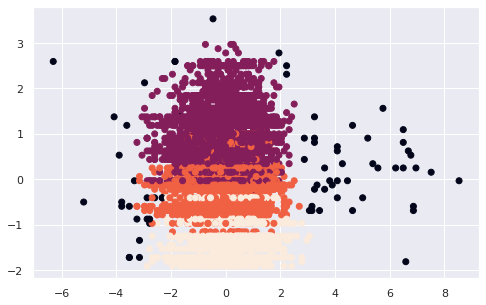

In [304]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=( 8 , 5 ))
plt.scatter(X[:,1], X[:,2], c=y_pred)

**Note** : The black colour dots are noise.

## **4. Dendrogram**

A **dendrogram** is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering. The main use of a dendrogram is to work out the best way to allocate objects to clusters. The dendrogram below shows the hierarchical clustering of six observations shown on the scatterplot to the left. (Dendrogram is often miswritten as dendogram.)

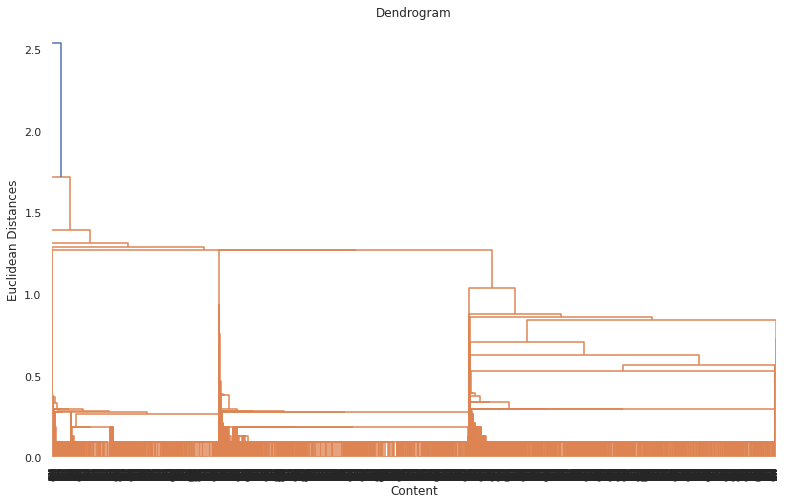

In [305]:
# Let's import sch
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

**Note** : The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold

No. of Cluster = 3

## **5. Agglomerative Clustering**

**Agglomerative clustering** begins with N groups, each containing initially one entity, and then the two most similar groups merge at each stage until there is a single group containing all the data.

In [306]:
# Let's  import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

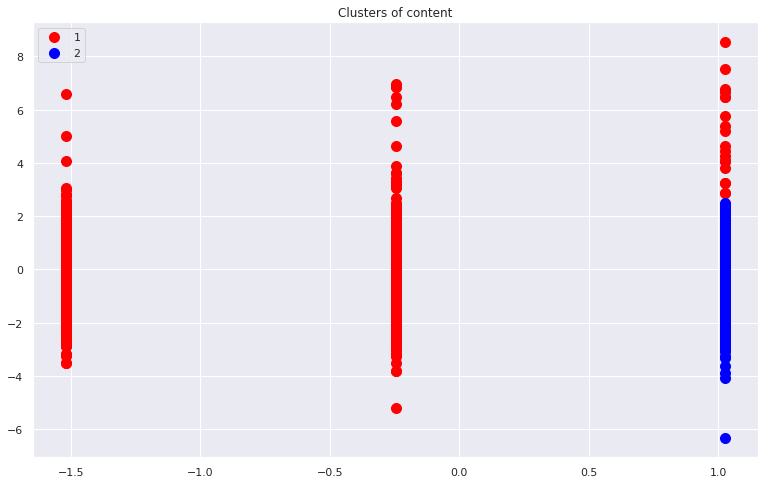

In [307]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
# plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')

plt.title('Clusters of content')

plt.legend()
plt.show()

# **7. Conclusions**


---




1. Director and cast contains a large number of null values so we will drop these 2 columns .
2. In this dataset there are two types of contents where 30.86% includes TV shows and the
remaining 69.14% carries Movies. 
3. We have reached a conclusion from our analysis from the content added over years that Netflix is focusing movies and TV shows (Fom 2016 data we get to know that Movies is increased by 80% and TV shows is increased by 73% compare) 
4. From the dataset insights we can conclude that the most number of TV Shows released in 2017 and for Movies it is 2020 

5. On Netflix USA has the largest number of contents. And most of the countries preferred to produce movies more than TV shows. 
6. Most of the movies are belonging to 3 categories 
7. TOP 3 content categories are International movies , dramas , comedies. 
8. In text analysis (NLP) I used stop words, removed punctuations , stemming & TF-IDF vectorizer and other functions of NLP. 
9. Applied different clustering models like Kmeans, hierarchical, Agglomerative clustering, DBSCAN on data we got the best cluster arrangements. 
10. By applying different clustering algorithms to our dataset .we get the optimal number of cluster is equal to 3